<a href="https://colab.research.google.com/github/Manikantan-S/passwordanalysis/blob/main/passwordanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv("/content/drive/MyDrive/passwords/common_passwords.csv")

In [3]:

data.head(25)

,password,length,num_chars,num_digits,num_upper,num_lower,num_special,num_vowels,num_syllables
0,123456,6,0,6,0,0,0,0,1
1,password,8,8,0,0,8,0,2,2
2,12345678,8,0,8,0,0,0,0,1
3,qwerty,6,6,0,0,6,0,1,3
4,123456789,9,0,9,0,0,0,0,1
5,12345,5,0,5,0,0,0,0,1
6,1234,4,0,4,0,0,0,0,1
7,111111,6,0,6,0,0,0,0,1
8,1234567,7,0,7,0,0,0,0,1
9,dragon,6,6,0,0,6,0,2,2


In [4]:
data.isnull().sum()

password         0
length           0
num_chars        0
num_digits       0
num_upper        0
num_lower        0
num_special      0
num_vowels       0
num_syllables    0
dtype: int64

In [5]:
data.describe()

,length,num_chars,num_digits,num_upper,num_lower,num_special,num_vowels,num_syllables
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,6.651300,5.030300,1.617600,0.025300,5.005000,0.003400,1.805900,1.606600
std,1.370947,2.804098,2.971911,0.322909,2.809727,0.119958,1.242409,0.681383
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,4.000000,0.000000,0.000000,4.000000,0.000000,1.000000,1.000000
50%,7.000000,6.000000,0.000000,0.000000,6.000000,0.000000,2.000000,2.000000
75%,8.000000,7.000000,1.000000,0.000000,7.000000,0.000000,3.000000,2.000000
max,16.000000,13.000000,12.000000,8.000000,13.000000,6.000000,10.000000,6.000000


In [6]:
data.nunique()


password         9998
length             13
num_chars          14
num_digits         13
num_upper           9
num_lower          14
num_special         6
num_vowels         10
num_syllables       7
dtype: int64

In [7]:
#top 10 longest password
data.sort_values(by='length', ascending=False)[['password', 'length']].head(10)

,password,length
4761,PolniyPizdec0211,16
2201,Mailcreated5240,15
3338,Sojdlg123aljg,13
11,wrongpassword,13
2609,123456qwerty,12
8968,123456789qwe,12
9364,masterbating,12
1239,123qweasdzxc,12
1664,q1w2e3r4t5y6,12
6511,ghjcnjgfhjkm,12


In [8]:
#top 10 shortest passwords
data.sort_values(by='length', ascending=True)[['password', 'length']].head(10)

,password,length
4349,sex,3
8186,mad,3
1591,123,3
5214,shao,4
718,1980,4
8025,hung,4
6134,beta,4
8020,junk,4
4760,qiao,4
6146,1949,4


(0.0, 16.0, 0.0, 4000.0)

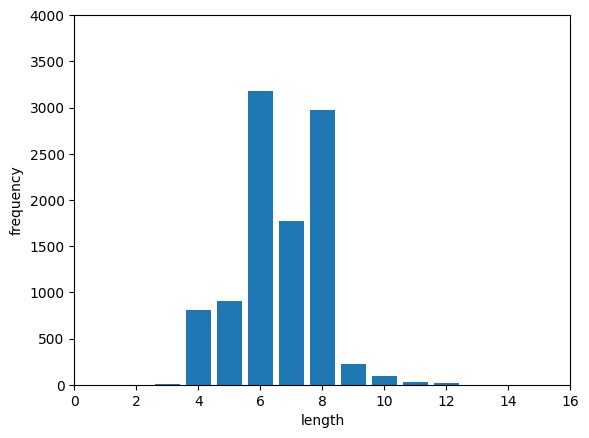

In [9]:

#plotting password length data
plt.bar(np.sort(data['length'].unique()), data.groupby('length')['length'].count().values)
plt.xlabel('length')
plt.ylabel('frequency')
plt.axis([0,16,0,4000])

<Axes: >

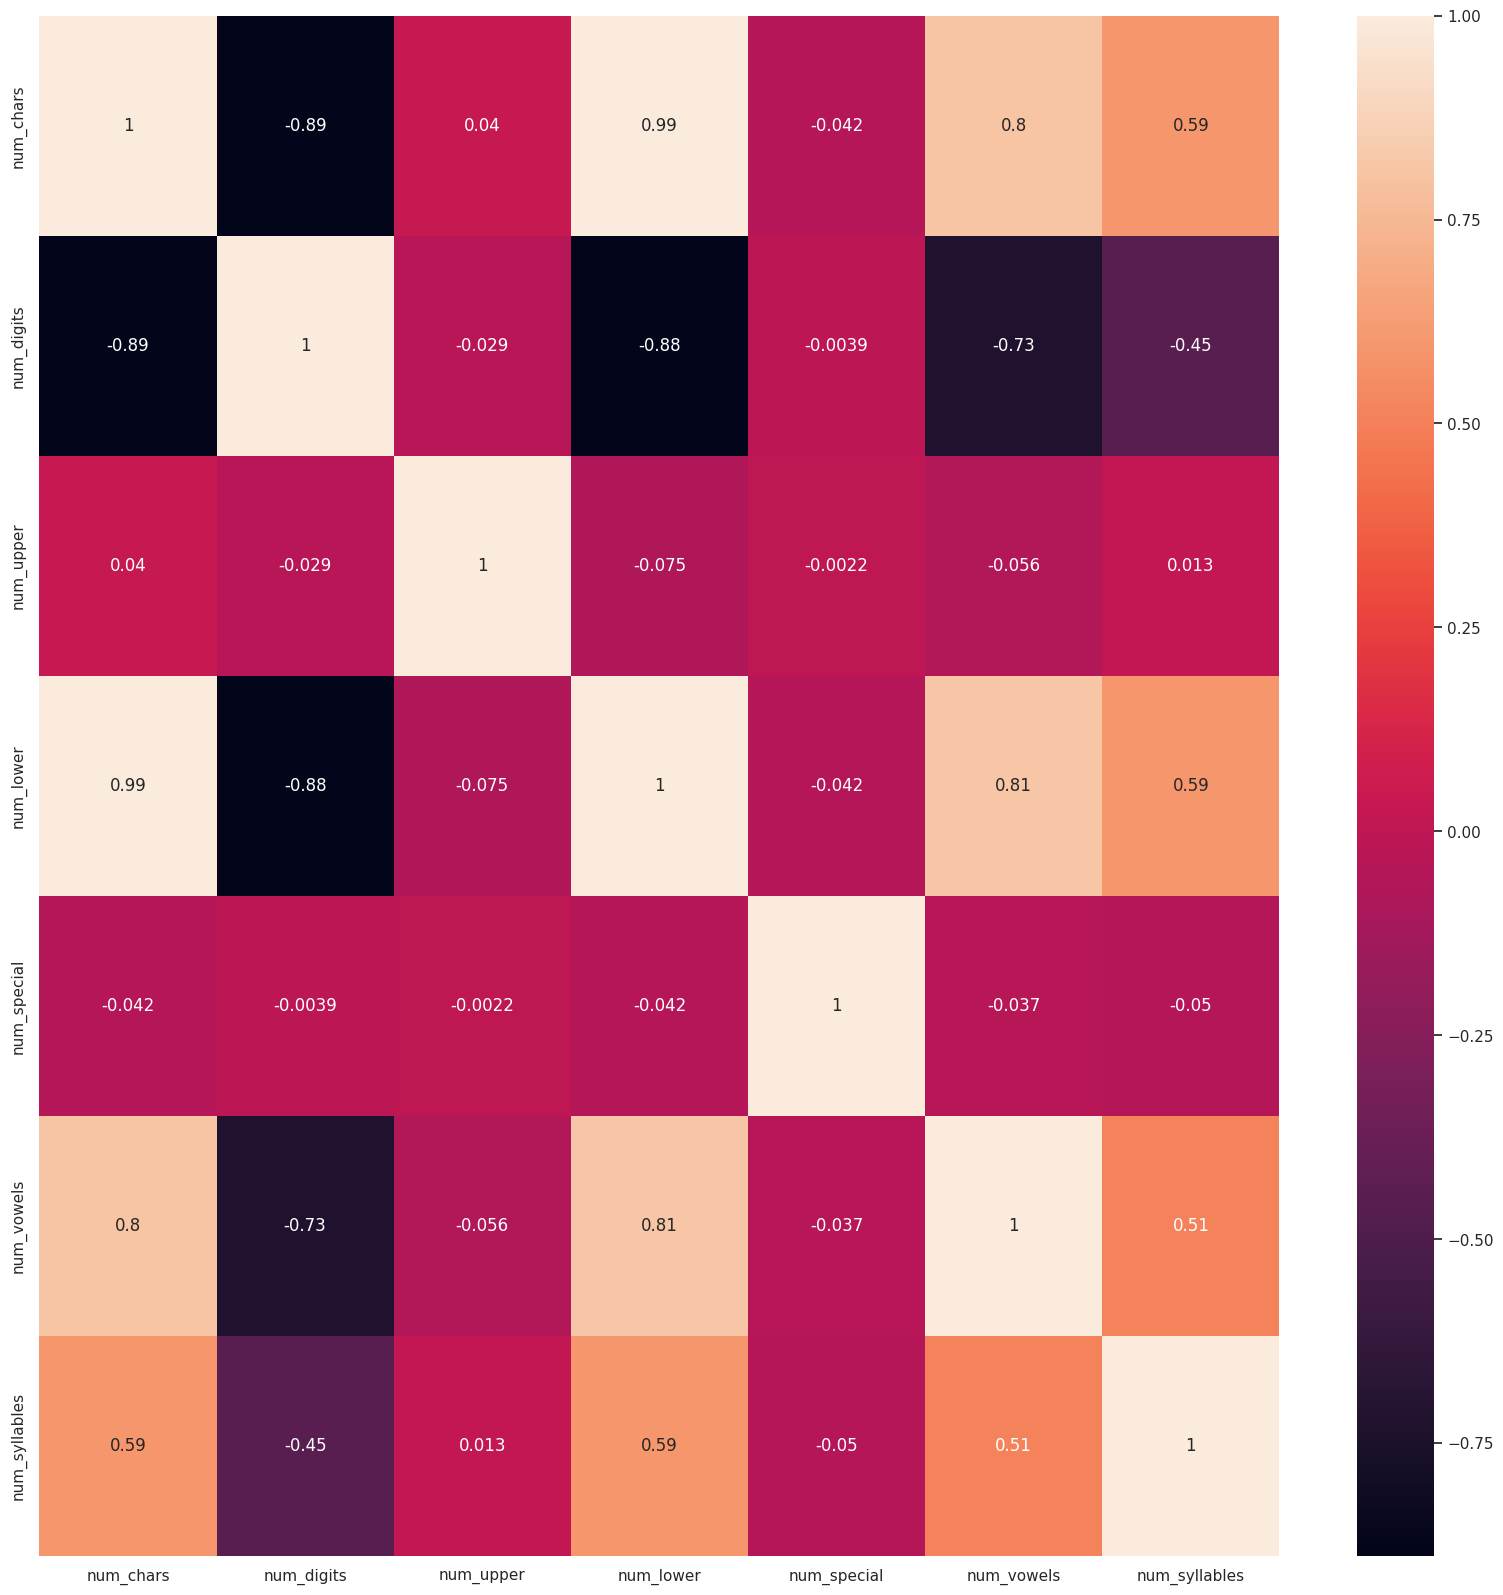

In [10]:

#Now, let's see corr.between features
plt.figure(figsize=(20,20))
sns.set(font_scale=1)
sns.heatmap(data=data[['num_chars', 'num_digits', 'num_upper',
       'num_lower', 'num_special', 'num_vowels', 'num_syllables']].corr(),annot = True)